In [1]:
# Problem 1 part c
# Problem 3 part b
import numpy as np
from pylab import zeros,plot,xlabel,ylabel,show

# Constants
nu = 0.05   # Constant nu
N = 101  # Number of divisions in grid
dx = L/N       # Grid spacing
dt = 1e-6   # Time-step
epsilon = dt/1000

t1 = 0.2
t2 = 0.4
t3 = 0.6
t4 = 0.8
t5 = 1
tend = t5 + epsilon
# Create arrays
u = np.empty(N+1,float)
for i in range(len(u)):
    u[i] = 0.1*np.e**-(((i*dx-0.5)**2)/(.1**2))
u[0] = 0; u[-1] = 0
plot(u)
# Calculating the derivative of dy/dt
def dft(y):
    ut = 0.0*u
    ut[1:-1] = -u[1:-1]*(u[2:] - u[0:-2])/(2*dx) + nu*(u[2:] - 2*u[1:-1] + u[0:-2])/(dx**2)
    ut[0] = -u[0]*(u[1] - u[-2])/(2*dx) + nu*(u[1] - 2*u[0] + u[-2])/(dx**2)
    ut[-1] = ut[0]
    return(ut)
# Main loop
t=0.0
x = np.linspace(0,2,N+1)
while t<tend:
    # Runge Kutta
    k1 = dt*deriv(u)
    k2 = dt*deriv(u+0.5*k1)
    k3 = dt*deriv(u+0.5*k1)
    k4 = dt*deriv(u+k3)
    u += (k1 + 2*k2 + 2*k3 + k4)/6
    u[0] = u[-2]; u[-1] = u[1]
    t += dt
    
    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plot(x,u)
    if abs(t-t2)<epsilon:
        plot(x,u)
    if abs(t-t3)<epsilon:
        plot(x,u)
    if abs(t-t4)<epsilon:
        plot(x,u)
    if abs(t-t5)<epsilon:
        plot(x,u)

title("Burgers Equation for Gaussian Pulse amplitude 0.1")
xlabel("x")
ylabel("u")
axis([0,2,-.01,.05])
show()

NameError: name 'L' is not defined

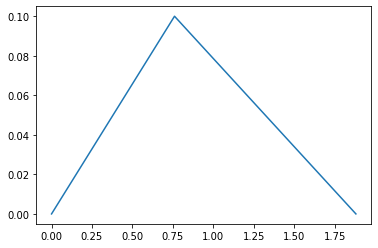

In [2]:
import numpy as np
from matplotlib import pylab as py
N = 100
eps = 7.5e-6
c = 250
nu = .5
L = 1.9
x = np.arange(0,L,L/N)

def upluck(N,npeak):
    amp = 0.1
    u = np.zeros(N)
    u[:npeak] = amp*x[:npeak]/x[npeak]
    u[npeak:] = amp*(x[-1] - x[npeak:])/(x[-1] - x[npeak])
    return(u)

u = upluck(N,int(0.4*N))
py.plot(x,u)
py.show()

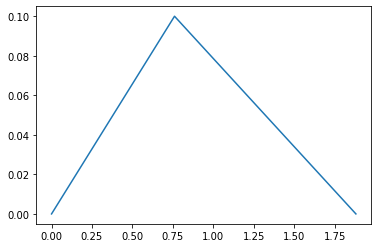

In [3]:
# use dt instead of dx for fourier transform wrt time
def fftsine(f,x):
    N = len(x)
    dx = x[1] - x[0]
    L = dx*N
    b = np.zeros(N)
    k = 2*np.pi*(np.arange(N) + 1)/(2*L)
    for i in range(N):
        b += 2*f[i]*np.sin(k*x[i])*dx/L
    return(b)
def fftsinei(b,x):
    N = len(x)
    dx = x[1] - x[0]
    L = dx*N
    f = np.zeros(N)
    k = 2*np.pi*(np.arange(N) + 1)/(2*L)
    for i in range(N):
        f += b[i]*np.sin(k[i]*x)
    return(f)
b = fftsine(u,x)
ui = fftsinei(b,x)
py.plot(x,ui)
py.show()

[ 7.97739508e-02  1.30348705e-02 -5.91526363e-03 -4.79014484e-03
 -2.15359402e-04  2.43169305e-03  8.70304487e-04 -6.50670504e-04
 -1.12386854e-03  1.07012738e-04  5.77725616e-04  4.39973601e-04
 -3.81643511e-04 -3.43368757e-04 -7.05983012e-05  3.88552360e-04
  1.15104882e-04 -1.00051876e-04 -2.85814341e-04  5.21641277e-05
  1.40616939e-04  1.54522597e-04 -1.43526841e-04 -1.04392054e-04
 -4.09188739e-05  1.65639360e-04  3.52635509e-05 -3.19865253e-05
 -1.37663249e-04  3.32645848e-05  5.90927559e-05  8.39508520e-05
 -7.99373764e-05 -4.83232742e-05 -2.76585032e-05  9.61861281e-05
  1.50981143e-05 -1.40821577e-05 -8.44493405e-05  2.33285071e-05
  3.27594443e-05  5.46695116e-05 -5.26925870e-05 -2.86076100e-05
 -1.98449079e-05  6.48378565e-05  8.59171325e-06 -8.26003803e-06
 -5.86799870e-05  1.69491525e-05  2.22561434e-05  3.91166460e-05
 -3.79587874e-05 -2.05099350e-05 -1.44759438e-05  4.76215607e-05
  6.66270671e-06 -6.59926019e-06 -4.39191319e-05  1.23142801e-05
  1.78891498e-05  2.95411

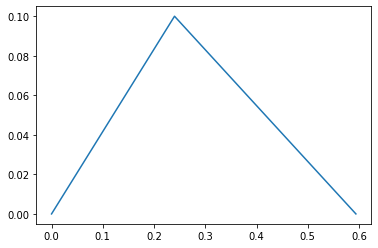

In [10]:
# The reason we fourier transform is to turn a pde into an ode
# we then make the integration forward in time, and then use an inverse fourier 
# transformation to get our function back into real space
t0 = 0
t1 = 2
nt = 200000
dt = (t1 - t0)/nt
u = upluck(N,int(0.4*N))
b = fftsine(u,x)
py.plot(x,u)

kx2 = (2*np.pi*(np.arange(N) + 1)/(2*L))**2
kx4 = (2*np.pi*(np.arange(N) + 1)/(2*L))**4
v = 0.0*b

def deriv(b,v):
    return(np.array([v,-2*nu*v - c**2*kx2*b - eps*L**2*c**2*kx4*b]))
for t in np.arange(t0,t1+dt,dt):
    k1 = dt*deriv(b,v)
    k2 = dt*deriv(b+0.5*k1[0,:],v+0.5*k1[1,:])
    k3 = dt*deriv(b+0.5*k2[0,:],v+0.5*k2[1,:])
    k4 = dt*deriv(b+k3[0,:],v+k3[1,:])
    step = (k1 + 2*k2 + 2*k3 + k4)/6
    b += step[0,:]
    v += step[1,:]
    
    if np.abs(t-0.04) < dt/2 or np.abs(t-0.08) < dt/2 or \
        np.abs(t-0.12) < dt/2 or np.abs(t-0.16) < dt/2 or \
        np.abs(t-0.20) < dt/2:
        u = fftsinei(b,x)
#         py.plot(x,u)
        
u = fftsinei(b,x)
# py.plot(x,u)
# # py.axis(0,2,-.12,.12)
# py.show()

In [40]:
import matplotlib.cm as cm
L = 0.6
c = 120
nt = 200000
dt = (t1 - t0)/nt
N = 100
x = np.arange(0,L,L/N)
y = np.arange(0,L,L/N)
z = np.zeros([N])
w = L/10
z[0:N] = np.exp(-((x[0:N]-(L/2))**2)/w**2)*np.exp(-((y[0:N]-(L/2))**2)/w**2)
t0 = 0
t1 = 40


1.9287498479639178e-22
1.396943943147109e-21
9.720985020300779e-21
6.499347972070939e-20
4.175010055850544e-19
2.5767571091549626e-18
1.5279799682872937e-17
8.70542662229625e-17
4.765304735299089e-16
2.5062218871452567e-15
1.2664165549094176e-14
6.148396412704779e-14
2.867975008888108e-13
1.2853372251336548e-12
5.534610071701053e-12
2.2897348456455607e-11
9.101470764487969e-11
3.475891281239934e-10
1.2754076295260444e-09
4.496349462280854e-09
1.5229979744712632e-08
4.9564053191724975e-08
1.5497531357028994e-07
4.6557157157831025e-07
1.3438122776315284e-06
3.7266531720786714e-06
9.929504305851083e-06
2.541934651619929e-05
6.252150377482037e-05
0.00014774836023203418
0.0003354626279025118
0.0007318024188804734
0.0015338106793244659
0.003088715408236775
0.0059760228950059575
0.011108996538242306
0.019841094744370295
0.03404745473459939
0.0561347628341338
0.08892161745938647
0.1353352832366127
0.19789869908361477
0.27803730045319436
0.37531109885139985
0.48675225595997207
0.606530659712634

In [61]:
import matplotlib.cm as cm
L = 0.6
c = 120
nt = 200000
dt = (t1 - t0)/nt
N = 100
x = np.arange(0,L,L/N)
y = np.arange(0,L,L/N)
z = np.zeros([N])
w = L/10
z[0:N] = np.exp(-((x[0:N]-(L/2))**2)/w**2)*np.exp(-((y[0:N]-(L/2))**2)/w**2)
z[0] = 0
z[-1] = 0
t0 = 0
t1 = 40
def fftcos(z,y):
    N = len(y)
    dy = y[1] - y[0]
    L = dy*N
    b = np.zeros(N)
    k = 2*np.pi*(np.arange(N) + 1)/(2*L)
    for i in range(N):
        b += 2*z[i]*np.cos(k*y[i])*dy/L
    return(b)
def fftcosi(b,y):
    N = len(y)
    dy = y[1] - y[0]
    L = dy*N
    f = np.zeros(N)
    k = 2*np.pi*(np.arange(N) + 1)/(2*L)
    for i in range(N):
        f += b[i]*np.cos(k*y[i]*y)
    return(f)
a = fftsine(z,x)
b = fftcos(z,y)
kx2 = (2*np.pi*(np.arange(N) + 1)/(2*L))**2
v = 0.0*(b*a)
def deriv(a,b,v):
    return(np.array([v, -c**2*(kx2*a + kx2*b)]))
for t in np.arange(t0,t1+dt,dt):
    k1 = dt*deriv(a,b,v)
    k2 = dt*deriv(a+0.5*k1[0,:],b+0.5*k1[0,:],v+0.5*k1[1,:])
    k3 = dt*deriv(a+0.5*k2[0,:],b+0.5*k2[0,:],v+0.5*k2[1,:])
    k4 = dt*deriv(a+k3[0,:],b+k3[0,:],v+k3[1,:])
    step = (k1 + 2*k2 + 2*k3 + k4)/6
    b += step[0,:]
    a += step[0,:]
    v += step[1,:]
    
    if np.abs(t-0.04) < dt/2 or np.abs(t-0.08) < dt/2 or \
        np.abs(t-0.12) < dt/2 or np.abs(t-0.16) < dt/2 or \
        np.abs(t-0.20) < dt/2:
        z = fftsinei(a,x)*fftcosi(b,y)
        py.plot(x,z)
        py.plot(y,z)
z = fftsinei(a,x)*fftcosi(b,y)
py.plot(x,z)
py.plot(y,z)
# py.axis(0,2,-.12,.12)
py.show()

[ 0. -0.  0. -0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.
  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.
  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0.  0.  0.  0.
  0.  0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0. -0. -0. -0. -0. -0.  0.
  0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0.  0.  0.  0. -0. -0.  0.  0.]


/Users/jaretkadlec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in multiply
/Users/jaretkadlec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in add
/Users/jaretkadlec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in add
/Users/jaretkadlec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in add
/Users/jaretkadlec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in add
